In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scanpy as sc
import numpy as np
import math

In [42]:
def PairGrid_overall_expression_celltypes(adata, mcp="mcp_0",show=True, samplewise=True):
    """creates PairGrid for overall expression values over all genes in celltypes"""
    
    def lin_reg(x, y, **kws):
        """linear regression between celltypes"""
        sns.regplot(x=list(my_data[x.name]), y=list(my_data[y.name]), data=my_data,scatter=False,line_kws={"color": "black"})

    def corrfunc(x, y, **kws):
        """pearson correlation between celltypes"""
        ax = plt.gca()
        x_in = list(my_data[x.name]) 
        y_in = list(my_data[y.name])
        x_in_wonan = []
        y_in_wonan = []
        for i in range(len(x_in)):
            if (not(math.isnan(x_in[i])) == True) and (not(math.isnan(y_in[i])) == True):
                x_in_wonan.append(x_in[i])
                y_in_wonan.append(y_in[i])
        r, _ = stats.pearsonr(x_in_wonan, y_in_wonan)
        ax.annotate("r = {:.2f}".format(round(r,2)),
                    xy=(.1, .9), xycoords=ax.transAxes)
        
    def annotate_celltype(x, **kws):
        """name of celltype on diagonal"""
        ax = plt.gca()
        ax.annotate(x.name,
                    xy=(.65, .9), xycoords=ax.transAxes)
        
    # reorganize data
    epithelial = []
    immune = []
    fibroblast = []
    samples = []
    condition = []
    for s in np.unique(adata.obs["Sample"]):
        samples.append(s)
        condition.append(adata.obs[(adata.obs["Sample"] == s)]["Health"][0])
        epithelial.append(np.mean(adata.obs[(adata.obs["Sample"] == s) & (adata.obs["cell_type"]=="epithelial")][mcp]))
        immune.append(np.mean(adata.obs[(adata.obs["Sample"] == s) & (adata.obs["cell_type"]=="immune")][mcp]))
        fibroblast.append(np.mean(adata.obs[(adata.obs["Sample"] == s) & (adata.obs["cell_type"]=="fibroblast")][mcp]))
     
    my_data = pd.DataFrame({"samples":samples, "condition":condition, "epithelial":epithelial, "immune":immune, "fibroblast":fibroblast})

    print(my_data)
    
    # create plot
    g = sns.PairGrid(my_data, diag_sharey=False, hue= "condition",dropna=True)
    g.map_lower(sns.scatterplot)
    g.map_lower(lin_reg)
    g.map_upper(sns.kdeplot, hue=None,color="black")
    g.map_diag(sns.kdeplot, hue=None, color="black")
    g.map_diag(sns.histplot)
    g.map_diag(annotate_celltype)
    g.map_upper(corrfunc, hue=None)
    g.add_legend() 

    y_pos = g.axes.shape[0]*int(g.axes.shape[1]/2)
    x_pos = len(g.axes.flatten())-2

    for idx, ax in enumerate(g.axes.flatten()):
        ax.set_ylabel('')
        ax.set_xlabel('')
        if idx == x_pos:
            ax.set_xlabel('overall gene expression celltype 2')
        if idx == y_pos:
            ax.set_ylabel('overall gene expression celltype 1')
    
    

    sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=mcp, frameon=False)
    if show:
        plt.show()
    return g
    

## sig genes: per MCP per Celltype
- look into results: sig1, sig2
- fibr x epi: MCP 1, 2, 3: sig1, sig2: down, up -> take both, up and down
- intersection over pairwise celltypes

In [38]:
adata_in = sc.read_h5ad("../../tmp_dialogue_experiments/data/uc-dialogue-reduced.h5ad")

        sample        health epithelial fibroblast    immune
0     N10.EpiA       Healthy  -0.018429        NaN  -0.04875
1     N10.EpiB       Healthy  -0.025226        NaN -0.033114
2      N10.LPA       Healthy   0.065376  -0.049283 -0.046455
3      N10.LPB       Healthy   0.025039  -0.058821 -0.038785
4    N106.EpiA  Non-inflamed  -0.019453        NaN       NaN
..         ...           ...        ...        ...       ...
128     N8.LPB       Healthy  -0.027197  -0.027228 -0.024262
129    N9.EpiA  Non-inflamed  -0.036783        NaN -0.014057
130    N9.EpiB      Inflamed  -0.013266        NaN -0.004282
131     N9.LPA  Non-inflamed    -0.0002  -0.031943  0.009932
132     N9.LPB      Inflamed   0.034226   0.021629 -0.007179

[133 rows x 5 columns]


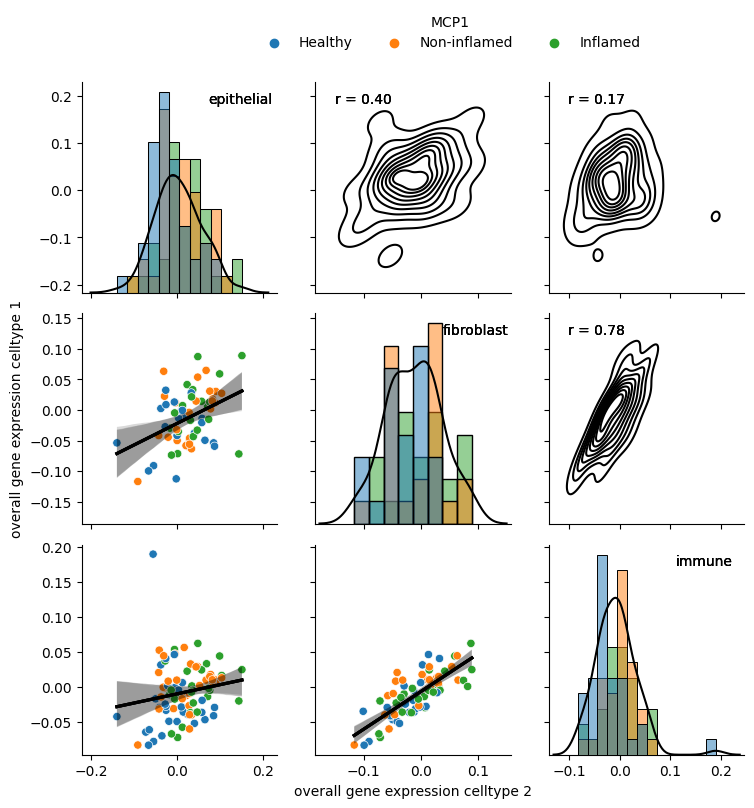

In [63]:
PairGrid_overall_expression_celltypes(adata_in, show=True)

In [3]:
adata_out_lp = sc.read_h5ad("../../tmp_dialogue_experiments/data/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")

In [27]:
adata_out_lp.X = adata_out_lp.X.toarray()

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.725307 -1.239555   -1.816570
1    N10.LPB       Healthy   -1.486311 -1.248596   -1.542845
2   N106.LPA  Non-inflamed   -0.090576 -0.631129    0.181978
3   N106.LPB      Inflamed    1.225737  0.442891    1.495817
4    N11.LPB       Healthy   -0.934961 -1.844280   -1.703575
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed    0.362866 -1.606744   -0.499102
61    N7.LPB      Inflamed    0.536670 -1.225013   -0.978809
62    N8.LPB       Healthy   -3.089735 -2.050586   -2.367656
63    N9.LPA  Non-inflamed   -1.184213 -1.850214   -1.307796
64    N9.LPB      Inflamed    0.723192 -1.769512   -0.905768

[65 rows x 5 columns]


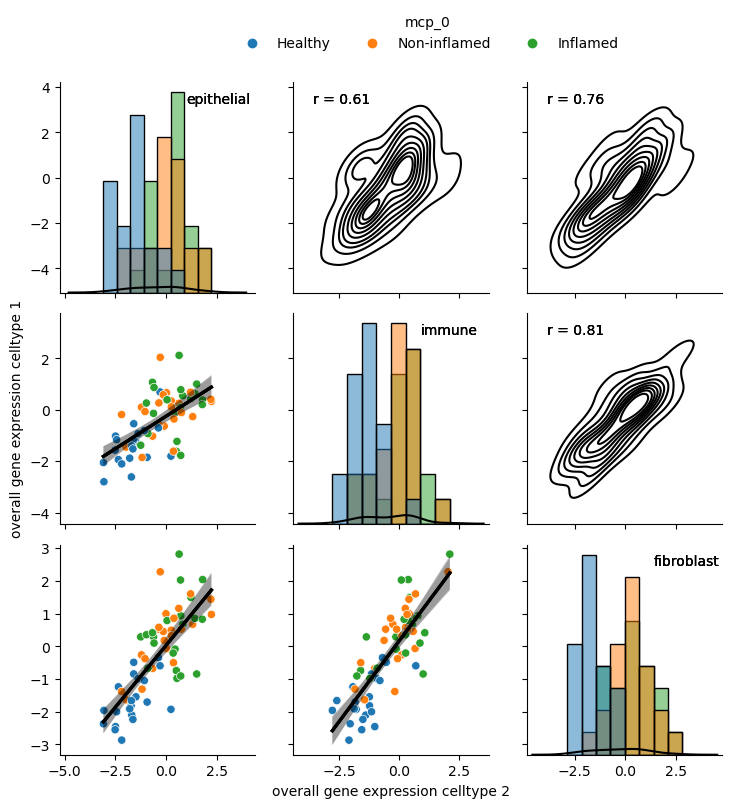

In [43]:
PairGrid_overall_expression_celltypes(adata_out_lp, show=True)

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.725307 -1.239555   -1.816570
1    N10.LPB       Healthy   -1.486311 -1.248596   -1.542845
2   N106.LPA  Non-inflamed   -0.090576 -0.631129    0.181978
3   N106.LPB      Inflamed    1.225737  0.442891    1.495817
4    N11.LPB       Healthy   -0.934961 -1.844280   -1.703575
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed    0.362866 -1.606744   -0.499102
61    N7.LPB      Inflamed    0.536670 -1.225013   -0.978809
62    N8.LPB       Healthy   -3.089735 -2.050586   -2.367656
63    N9.LPA  Non-inflamed   -1.184213 -1.850214   -1.307796
64    N9.LPB      Inflamed    0.723192 -1.769512   -0.905768

[65 rows x 5 columns]


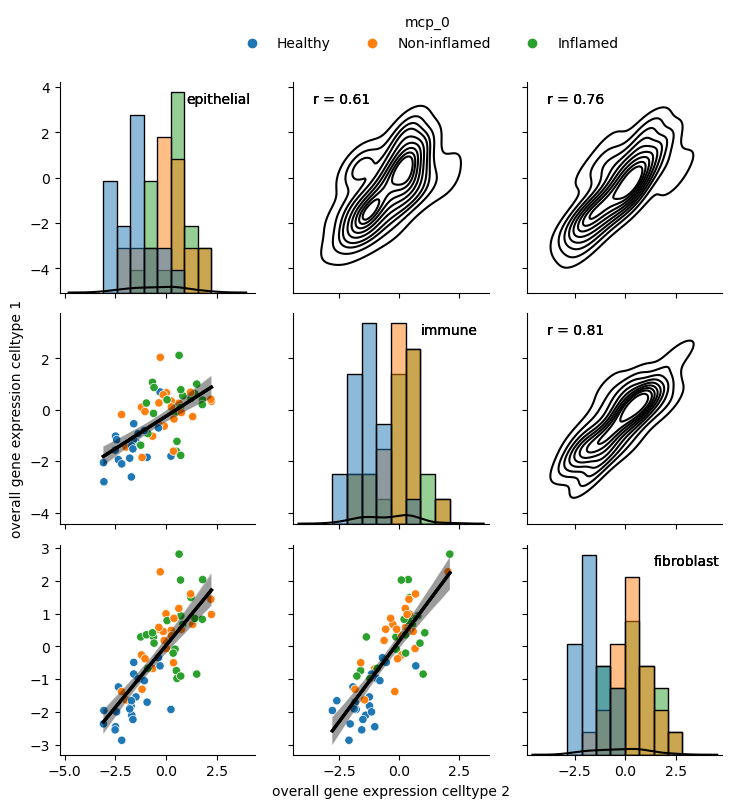

In [19]:
PairGrid_overall_expression_celltypes(adata_out_lp, show=True)

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.619100 -1.163653   -1.779095
1    N10.LPB       Healthy   -1.360313 -1.181661   -1.486535
2   N106.LPA  Non-inflamed   -0.205192 -0.650559    0.101402
3   N106.LPB      Inflamed    1.216224  0.419794    1.586538
4    N11.LPB       Healthy   -1.201542 -1.755200   -1.751731
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed    0.415794 -1.565751   -0.472265
61    N7.LPB      Inflamed    0.652733 -1.229996   -0.916633
62    N8.LPB       Healthy   -3.256562 -1.808078   -2.283076
63    N9.LPA  Non-inflamed   -1.108476 -1.885485   -1.224309
64    N9.LPB      Inflamed    0.763604 -1.775048   -0.757366

[65 rows x 5 columns]


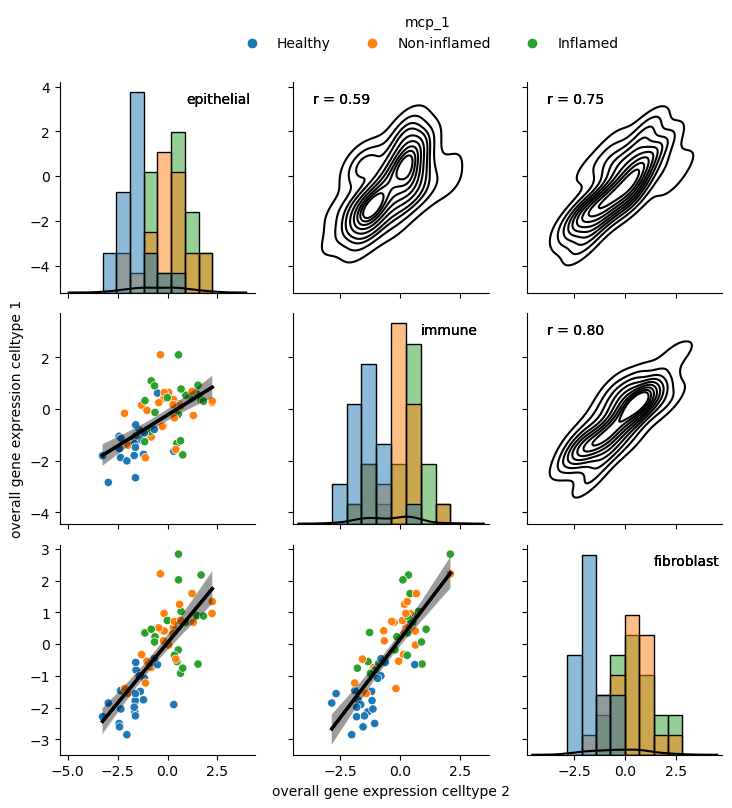

In [20]:
PairGrid_overall_expression_celltypes(adata_out_lp,mcp="mcp_1", show=True)

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.443103 -1.049925   -1.702534
1    N10.LPB       Healthy   -1.210689 -1.080328   -1.398108
2   N106.LPA  Non-inflamed   -0.318459 -0.685695   -0.014859
3   N106.LPB      Inflamed    1.200228  0.397118    1.645207
4    N11.LPB       Healthy   -1.478029 -1.608631   -1.744524
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed    0.511153 -1.478989   -0.441781
61    N7.LPB      Inflamed    0.817802 -1.210662   -0.840162
62    N8.LPB       Healthy   -3.329124 -1.548234   -2.160465
63    N9.LPA  Non-inflamed   -0.978047 -1.875712   -1.115760
64    N9.LPB      Inflamed    0.852293 -1.765032   -0.599979

[65 rows x 5 columns]


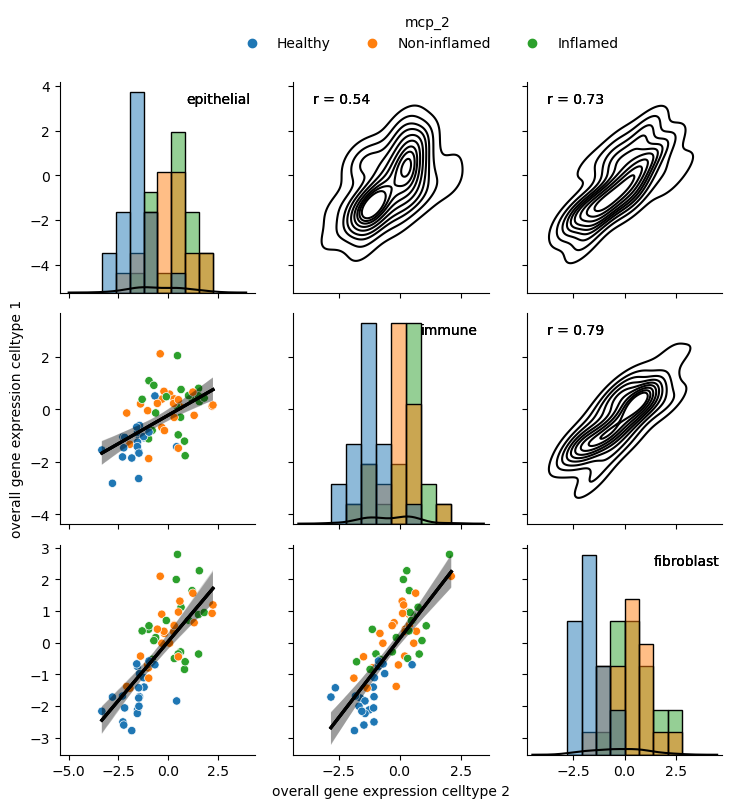

In [21]:
PairGrid_overall_expression_celltypes(adata_out_lp,mcp="mcp_2", show=True)

In [51]:
adata_out_lp.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type,mcp_0,mcp_1,mcp_2
N44.LPA.GGGAATGAGCGTTCCG-immune,Plasma,238.0,20502.0,N44,Non-inflamed,LP,N44.LPA,0.280753,immune,1.712737,1.866373,1.983769
N46.LPB.TCAGCAAAGTACGTAA-immune,Macrophages,2238.0,4667.0,N46,Healthy,LP,N46.LPB,0.027086,immune,-4.705158,-5.432347,-6.032409
N24.LPA.CATTATCTCTCTAGGA-immune,Plasma,592.0,3152.0,N24,Non-inflamed,LP,N24.LPA,0.274708,immune,-1.148733,-1.013324,-0.848050
N106.LPB.AAGGTTCCAGGACGTA-immune,CD4+ Memory,4288.0,8336.0,N106,Inflamed,LP,N106.LPB,0.033489,immune,1.275838,1.239457,1.167908
N19.LPA.CATGTACTTGGGAG-immune,CD4+ Memory,4932.0,10050.0,N19,Non-inflamed,LP,N19.LPA,0.098258,immune,-0.246794,-0.175792,-0.145853
...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,TA 1,365.0,640.0,N14,Inflamed,LP,N14.LPB,0.008487,epithelial,-0.455065,-0.701529,-0.976951
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,Cycling TA,2360.0,7990.0,N110,Inflamed,LP,N110.LPB,0.247375,epithelial,2.458134,2.934392,3.365323
N110.LPA.CATATGGTCGGTGTCG-epithelial,Cycling TA,867.0,1924.0,N110,Non-inflamed,LP,N110.LPA,0.014543,epithelial,-0.353579,-0.378860,-0.429141
N21.LPA.TTCATGTGACGGGA-epithelial,Enteroendocrine,2325.0,13540.0,N21,Healthy,LP,N21.LPA,0.295743,epithelial,-2.058020,-2.087892,-2.029131


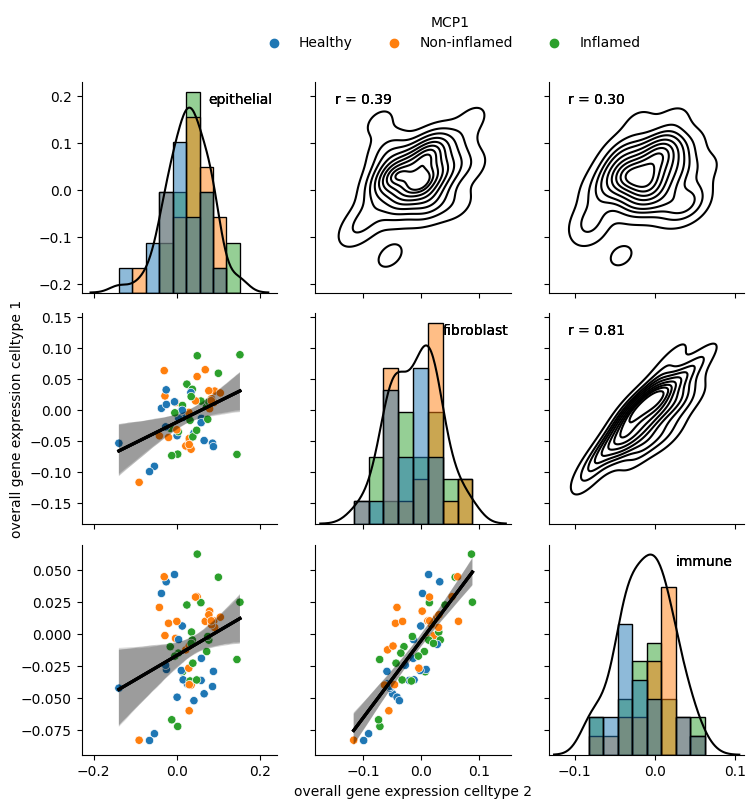

In [32]:
PairGrid_overall_expression_celltypes(adata_out_lp, show=True)

iterative approach

In [23]:
adata_out_iter = sc.read_h5ad("../../tmp_dialogue_experiments/data/uc-dialogue-reduced-output/uc-dialogue-reduced_pmd.h5ad")

In [35]:
adata_out_iter.X = adata_out_iter.X.toarray()

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -0.619369 -1.018325   -1.536903
1    N10.LPB       Healthy   -1.369428 -0.869147   -1.434612
2   N106.LPA  Non-inflamed   -0.931171 -0.342593   -0.069310
3   N106.LPB      Inflamed    1.057723  0.343721    0.082992
4    N11.LPB       Healthy   -2.308584 -1.309936   -1.598077
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed   -0.558557 -0.949077   -0.584351
61    N7.LPB      Inflamed    1.258352 -0.315165   -1.205656
62    N8.LPB       Healthy   -2.715949 -1.665618   -1.781383
63    N9.LPA  Non-inflamed   -1.333583 -1.114102   -1.140906
64    N9.LPB      Inflamed    1.081448 -1.395228   -1.302166

[65 rows x 5 columns]


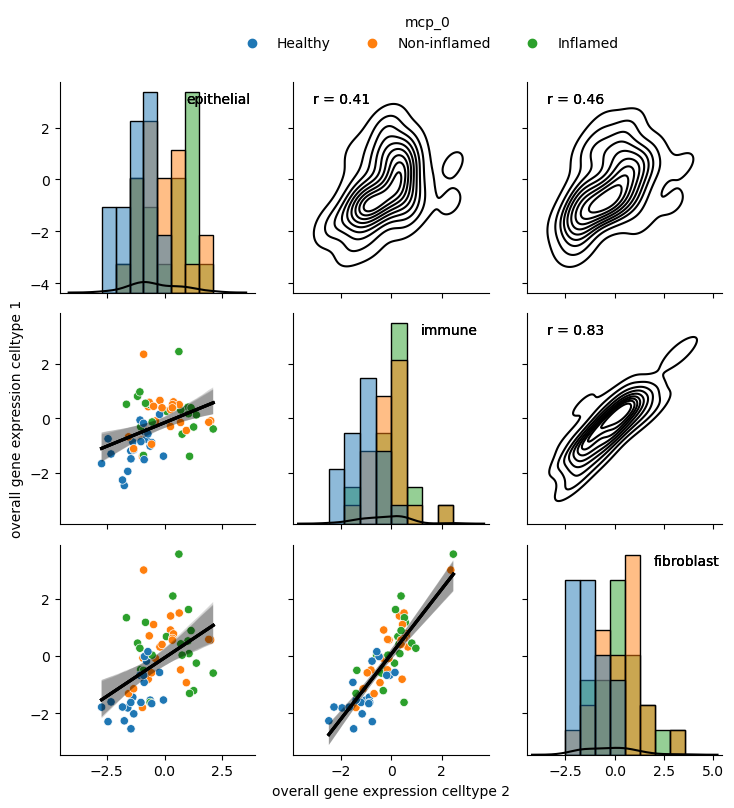

In [24]:
PairGrid_overall_expression_celltypes(adata_out_iter, show=True)

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.648164 -1.065617   -0.690252
1    N10.LPB       Healthy   -0.620123 -0.804065   -0.547617
2   N106.LPA  Non-inflamed    0.170006  0.894625    1.224524
3   N106.LPB      Inflamed   -0.042460 -0.016284    0.119693
4    N11.LPB       Healthy    1.177802 -1.868844   -1.018011
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed   -1.284261 -2.432944   -0.158770
61    N7.LPB      Inflamed   -0.351478 -1.185783   -0.730438
62    N8.LPB       Healthy    0.174995 -2.590740   -0.505421
63    N9.LPA  Non-inflamed   -0.348338  0.054355   -0.577183
64    N9.LPB      Inflamed   -0.583643 -1.459329   -0.735269

[65 rows x 5 columns]


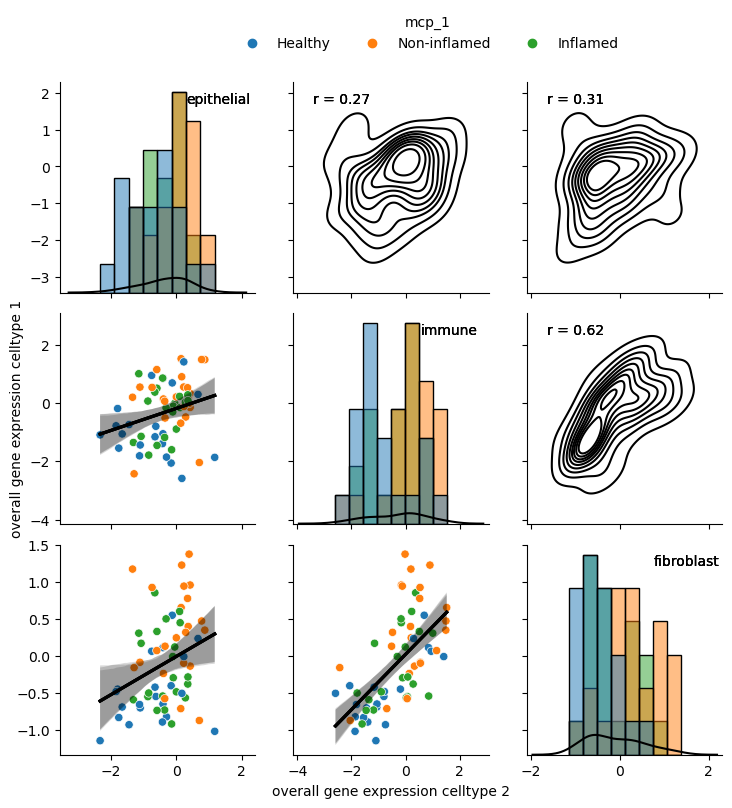

In [35]:
PairGrid_overall_expression_celltypes(adata_out_iter,mcp="mcp_1", show=True)

     samples     condition  epithelial    immune  fibroblast
0    N10.LPA       Healthy   -1.430702 -0.709291   -0.887888
1    N10.LPB       Healthy   -0.807529 -0.682219   -0.683452
2   N106.LPA  Non-inflamed    0.503350  0.042252    0.671982
3   N106.LPB      Inflamed    0.273520  0.089563    1.607229
4    N11.LPB       Healthy    0.958631 -1.076387   -0.930595
..       ...           ...         ...       ...         ...
60    N7.LPA  Non-inflamed    0.962085 -0.881802   -0.273397
61    N7.LPB      Inflamed   -1.111252 -0.476861   -0.546119
62    N8.LPB       Healthy   -3.784003  0.013664   -1.473345
63    N9.LPA  Non-inflamed   -0.995681 -1.206512   -0.787762
64    N9.LPB      Inflamed   -1.574975 -0.593584    0.189450

[65 rows x 5 columns]


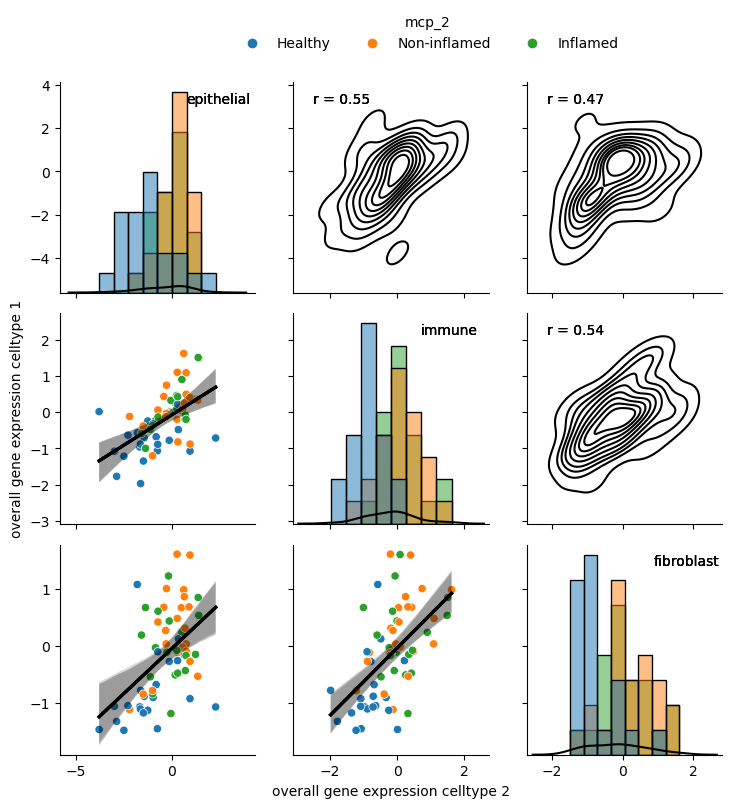

In [37]:
PairGrid_overall_expression_celltypes(adata_out_iter,mcp="mcp_2", show=True)

In [41]:
len(adata_in.X)

17988

In [45]:
len(adata_out_lp.X)

8576

# Everything tested

In [128]:
np.unique(adata_out.obs.cell_type)

array(['epithelial', 'fibroblast', 'immune'], dtype=object)

In [7]:
adata_out_red = sc.read_h5ad("../../tmp_dialogue_experiments/data/uc-dialogue-reduced.h5ad")

In [6]:
adata_out.obs["cell_type"]

N7.EpiA.AGACTCGAAAGGGC-immune               immune
N7.EpiA.ATAAGTACAGATCC-immune               immune
N7.EpiA.CGTACCTGAATCGC-immune               immune
N7.EpiA.CTTTAGACCAGGAG-immune               immune
N7.EpiA.TAGGTCGACAACCA-immune               immune
                                           ...    
N110.LPB.TTTGGTTGTGTGGCTC-epithelial    epithelial
N110.LPB.TTTGGTTTCCTTAATC-epithelial    epithelial
N110.LPB.TTTGGTTTCTTACCTA-epithelial    epithelial
N110.LPB.TTTGTCAAGGATGGAA-epithelial    epithelial
N110.LPB.TTTGTCAGTTGTTTGG-epithelial    epithelial
Name: cell_type, Length: 179878, dtype: category
Categories (3, object): ['immune', 'fibroblast', 'epithelial']

In [5]:
adata_out.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type
N7.EpiA.AGACTCGAAAGGGC-immune,Tregs,4298.0,6140.0,N7,Non-inflamed,Epi,N7.EpiA,0.247749,immune
N7.EpiA.ATAAGTACAGATCC-immune,CD8+ IELs,3941.0,4618.0,N7,Non-inflamed,Epi,N7.EpiA,0.085642,immune
N7.EpiA.CGTACCTGAATCGC-immune,CD8+ IELs,2514.0,26844.0,N7,Non-inflamed,Epi,N7.EpiA,0.156132,immune
N7.EpiA.CTTTAGACCAGGAG-immune,CD8+ IELs,3020.0,998.0,N7,Non-inflamed,Epi,N7.EpiA,0.173555,immune
N7.EpiA.TAGGTCGACAACCA-immune,CD8+ IELs,1524.0,23284.0,N7,Non-inflamed,Epi,N7.EpiA,0.157644,immune
...,...,...,...,...,...,...,...,...,...
N110.LPB.TTTGGTTGTGTGGCTC-epithelial,Immature Enterocytes 2,2553.0,11705.0,N110,Inflamed,LP,N110.LPB,0.190146,epithelial
N110.LPB.TTTGGTTTCCTTAATC-epithelial,TA 2,3234.0,16164.0,N110,Inflamed,LP,N110.LPB,0.109826,epithelial
N110.LPB.TTTGGTTTCTTACCTA-epithelial,Enterocyte Progenitors,258.0,384.0,N110,Inflamed,LP,N110.LPB,0.008006,epithelial
N110.LPB.TTTGTCAAGGATGGAA-epithelial,TA 1,487.0,772.0,N110,Inflamed,LP,N110.LPB,0.279918,epithelial


In [9]:
data = pd.DataFrame(adata_out.X)

In [124]:
data.mean(axis=1)

0        -0.031880
1        -0.036377
2        -0.061430
3        -0.049655
4        -0.080326
            ...   
179873    0.104633
179874    0.133777
179875   -0.128232
179876   -0.078543
179877   -0.107976
Length: 179878, dtype: float32

In [10]:
data['mean'] = data.mean(axis=1)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,18163,18164,18165,18166,18167,18168,18169,18170,18171,mean
0,-0.071099,-0.046869,-0.095600,-0.022454,-0.206022,-0.068991,-0.009954,-0.058434,-0.173868,-0.106611,...,-0.025867,-0.110714,-0.246393,-0.133998,-0.135010,-0.079793,-0.071727,-0.101684,-0.049300,-0.031880
1,-0.071099,-0.046869,-0.095600,-0.022454,-0.206022,-0.068991,-0.009954,-0.058434,-0.173868,-0.106611,...,-0.025867,-0.110714,-0.246393,-0.133998,-0.135010,-0.079793,-0.071727,-0.101684,-0.049300,-0.036377
2,-0.071099,-0.046869,-0.095600,-0.022454,-0.206022,-0.068991,-0.009954,-0.058434,-0.173868,-0.106611,...,-0.025867,-0.110714,-0.246393,-0.133998,-0.135010,-0.079793,-0.071727,-0.101684,-0.049300,-0.061430
3,-0.071099,-0.046869,-0.095600,-0.022454,-0.206022,-0.068991,-0.009954,-0.058434,-0.173868,-0.106611,...,-0.025867,-0.110714,-0.246393,-0.133998,-0.135010,-0.079793,-0.071727,-0.101684,-0.049300,-0.049655
4,-0.071099,-0.046869,-0.095600,-0.022454,-0.206022,-0.068991,-0.009954,-0.058434,-0.173868,-0.106611,...,-0.025867,-0.110714,-0.246393,-0.133998,-0.135010,-0.079793,-0.071727,-0.101684,-0.049300,-0.080325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179873,-0.038203,-0.018249,-0.012649,2.499703,6.221439,-0.015312,-0.006018,-0.019234,-0.229978,-0.234380,...,-0.005084,2.681278,-0.238807,-0.309836,-0.169271,-0.235780,-0.173968,-0.096812,-0.044908,0.104634
179874,-0.038203,-0.018249,-0.012649,-0.302880,-0.080661,-0.015312,-0.006018,-0.019234,-0.229978,-0.234380,...,-0.005084,-0.198337,-0.238807,1.043967,-0.169271,-0.235780,-0.173968,-0.096812,-0.044908,0.133777
179875,-0.038203,-0.018249,-0.012649,-0.302880,-0.080661,-0.015312,-0.006018,-0.019234,-0.229978,-0.234380,...,-0.005084,-0.198337,-0.238807,-0.309836,-0.169271,-0.235780,-0.173968,-0.096812,-0.044908,-0.128232
179876,-0.038203,-0.018249,-0.012649,-0.302880,-0.080661,-0.015312,-0.006018,-0.019234,-0.229978,-0.234380,...,-0.005084,-0.198337,-0.238807,-0.309836,-0.169271,-0.235780,-0.173968,-0.096812,-0.044908,-0.078543


In [12]:
sample_celltype_mean = data["mean"]

In [13]:
adata_out.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type
N7.EpiA.AGACTCGAAAGGGC-immune,Tregs,4298.0,6140.0,N7,Non-inflamed,Epi,N7.EpiA,0.247749,immune
N7.EpiA.ATAAGTACAGATCC-immune,CD8+ IELs,3941.0,4618.0,N7,Non-inflamed,Epi,N7.EpiA,0.085642,immune
N7.EpiA.CGTACCTGAATCGC-immune,CD8+ IELs,2514.0,26844.0,N7,Non-inflamed,Epi,N7.EpiA,0.156132,immune
N7.EpiA.CTTTAGACCAGGAG-immune,CD8+ IELs,3020.0,998.0,N7,Non-inflamed,Epi,N7.EpiA,0.173555,immune
N7.EpiA.TAGGTCGACAACCA-immune,CD8+ IELs,1524.0,23284.0,N7,Non-inflamed,Epi,N7.EpiA,0.157644,immune
...,...,...,...,...,...,...,...,...,...
N110.LPB.TTTGGTTGTGTGGCTC-epithelial,Immature Enterocytes 2,2553.0,11705.0,N110,Inflamed,LP,N110.LPB,0.190146,epithelial
N110.LPB.TTTGGTTTCCTTAATC-epithelial,TA 2,3234.0,16164.0,N110,Inflamed,LP,N110.LPB,0.109826,epithelial
N110.LPB.TTTGGTTTCTTACCTA-epithelial,Enterocyte Progenitors,258.0,384.0,N110,Inflamed,LP,N110.LPB,0.008006,epithelial
N110.LPB.TTTGTCAAGGATGGAA-epithelial,TA 1,487.0,772.0,N110,Inflamed,LP,N110.LPB,0.279918,epithelial


In [14]:
sample_celltype_mean

0        -0.031880
1        -0.036377
2        -0.061430
3        -0.049655
4        -0.080325
            ...   
179873    0.104634
179874    0.133777
179875   -0.128232
179876   -0.078543
179877   -0.107975
Name: mean, Length: 179878, dtype: float32

In [125]:
data_to_plot = pd.DataFrame({"sample":list(adata_out.obs["Sample"]), "expr":sample_celltype_mean, "celltype":list(adata_out.obs["cell_type"]), "health": list(adata_out.obs["Health"])})

In [126]:
data_to_plot

,sample,expr,celltype,health
0,N7.EpiA,-0.031880,immune,Non-inflamed
1,N7.EpiA,-0.036377,immune,Non-inflamed
2,N7.EpiA,-0.061430,immune,Non-inflamed
3,N7.EpiA,-0.049655,immune,Non-inflamed
4,N7.EpiA,-0.080325,immune,Non-inflamed
...,...,...,...,...
179873,N110.LPB,0.104634,epithelial,Inflamed
179874,N110.LPB,0.133777,epithelial,Inflamed
179875,N110.LPB,-0.128232,epithelial,Inflamed
179876,N110.LPB,-0.078543,epithelial,Inflamed


In [127]:
len(np.unique(data_to_plot["sample"]))

133

### new approach

In [17]:
samples = np.unique(data_to_plot["sample"])
health=None
my_data = pd.DataFrame({"sample":samples, 'epithelial':None, 'fibroblast':None, 'immune':None, "health":None})

In [18]:
my_data

,sample,epithelial,fibroblast,immune,health
0,N10.EpiA,None,None,None,None
1,N10.EpiB,None,None,None,None
2,N10.LPA,None,None,None,None
3,N10.LPB,None,None,None,None
4,N106.EpiA,None,None,None,None
...,...,...,...,...,...
128,N8.LPB,None,None,None,None
129,N9.EpiA,None,None,None,None
130,N9.EpiB,None,None,None,None
131,N9.LPA,None,None,None,None


In [19]:
celltypes = np.unique(data_to_plot["celltype"])
for sample in my_data["sample"]:
    for celltype in celltypes:
        mean_expr_c = data_to_plot[(data_to_plot["sample"]==sample) & (data_to_plot["celltype"]==celltype)]["expr"].mean()
        my_data.loc[(my_data["sample"]==sample),celltype]=mean_expr_c
    healthstatus =list(data_to_plot[(data_to_plot["sample"]==sample)]["health"])
    my_data.loc[(my_data["sample"]==sample),"health"] = healthstatus[0]
    

In [20]:
my_data

,sample,epithelial,fibroblast,immune,health
0,N10.EpiA,-0.019844,-0.044964,-0.028326,Healthy
1,N10.EpiB,-0.019428,NaN,-0.026041,Healthy
2,N10.LPA,0.022797,-0.051643,-0.041658,Healthy
3,N10.LPB,0.020958,-0.058675,-0.041861,Healthy
4,N106.EpiA,-0.003678,NaN,NaN,Non-inflamed
...,...,...,...,...,...
128,N8.LPB,-0.020341,-0.026148,-0.026939,Healthy
129,N9.EpiA,-0.033679,0.011193,-0.005076,Non-inflamed
130,N9.EpiB,0.022416,NaN,-0.025909,Inflamed
131,N9.LPA,0.027707,-0.026531,-0.008867,Non-inflamed


## neuer dataframe länge 133: samples x celltypes und health

In [37]:
def corrfunc(x, y, **kws):
    ax = plt.gca()
    x_in = list(my_data[x.name]) 
    y_in = list(my_data[y.name])
    x_in_wonan = []
    y_in_wonan = []
    for i in range(len(x_in)):
        if (not(math.isnan(x_in[i])) == True) and (not(math.isnan(y_in[i])) == True):
            x_in_wonan.append(x_in[i])
            y_in_wonan.append(y_in[i])
    r, _ = stats.pearsonr(x_in_wonan, y_in_wonan)
    ax.annotate("r = {:.2f}".format(round(r,2)),
                xy=(.1, .9), xycoords=ax.transAxes)

In [62]:
def lin_reg(x, y, **kws):
    sns.regplot(x=list(my_data[x.name]), y=list(my_data[y.name]), data=my_data,scatter=False,line_kws={"color": "black"})

In [106]:
def annotate_celltype(x, **kws):
    ax = plt.gca()
    ax.annotate(x.name,
                xy=(.65, .9), xycoords=ax.transAxes)

In [118]:
g = sns.PairGrid(my_data, diag_sharey=False, hue= "health",dropna=True)
g.map_lower(sns.scatterplot)
g.map_lower(lin_reg)
g.map_upper(sns.kdeplot, hue=None,color="black")
g.map_diag(sns.kdeplot, hue=None, color="black")
g.map_diag(sns.histplot)
g.map_diag(annotate_celltype)
g.map_upper(corrfunc, hue=None)
g.add_legend() 
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)


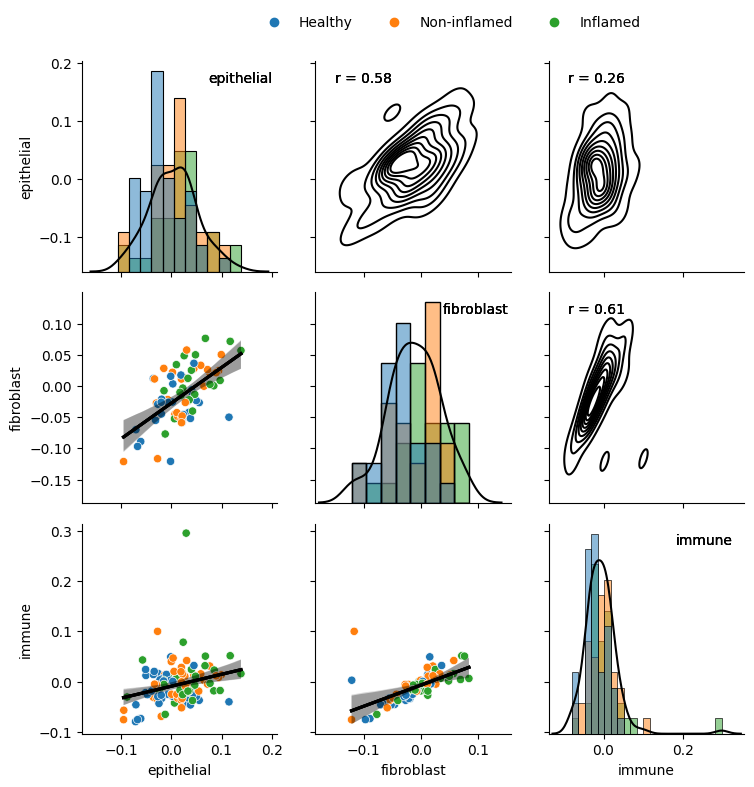

In [119]:
plt.show()